# Week 7-11 영어 리뷰 단어 분포 살펴보기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.chdir('D:\kjw\lecture\LG전자_21\week7_자연어처리')
review_df=pd.read_csv("thinq_e_review.csv")


In [2]:
#word count
word_counts = review_df['comment'].apply(lambda x:len(x.split(' ')))

In [3]:
word_counts.head()

0    57
1    59
2    56
3    58
4    57
Name: comment, dtype: int64

In [4]:
word_counts.describe()

count    11280.000000
mean        26.573670
std         18.052904
min          2.000000
25%         11.000000
50%         21.000000
75%         40.000000
max         71.000000
Name: comment, dtype: float64

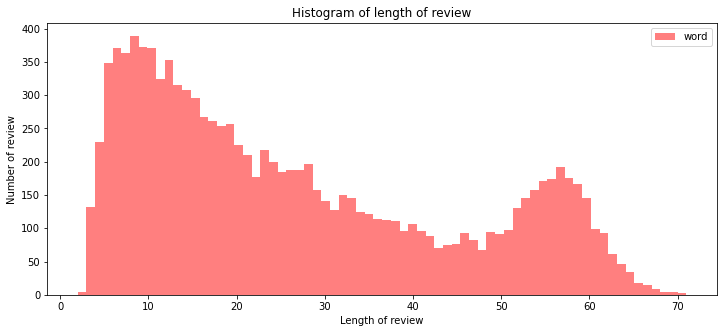

In [5]:
# word count 히스토그램 그리기
plt.figure(figsize=(12, 5))
plt.hist(word_counts, bins=70, alpha=0.5, color= 'r', label='word')
plt.legend()
# 그래프 제목
plt.title('Histogram of length of review')
# 그래프 x 축 라벨
plt.xlabel('Length of review')
# 그래프 y 축 라벨
plt.ylabel('Number of review')
plt.show()

<AxesSubplot:xlabel='REVIEW'>

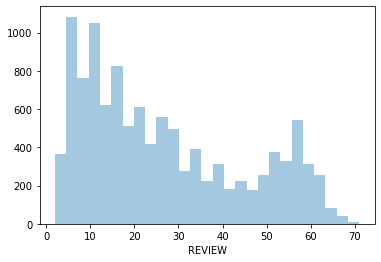

In [27]:
# sns에서 히스토그램 그리기

sns.distplot(word_counts,kde=False)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


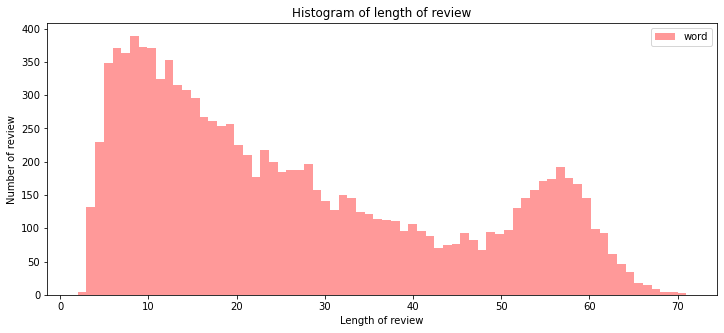

In [44]:
plt.figure(figsize=(12, 5))
ax = sns.distplot(word_counts,kde=False,bins=70,color='r')
ax.set_xlabel('Length of review')
ax.set_ylabel('Number of review')
ax.set_title('Histogram of length of review')
ax.legend(labels=['word'])
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x27d3ca20850>,
 'caps': [<matplotlib.lines.Line2D at 0x27d3ca20f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x27d3ca204f0>],
 'medians': [<matplotlib.lines.Line2D at 0x27d3ca3b610>],
 'fliers': [<matplotlib.lines.Line2D at 0x27d3ca3bcd0>],
 'means': [<matplotlib.lines.Line2D at 0x27d3ca3b970>]}

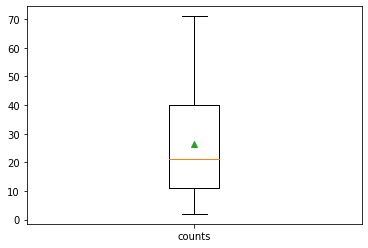

In [29]:
# 박스 플랏
plt.boxplot(word_counts,
             labels=['counts'],
             showmeans=True)

<AxesSubplot:>

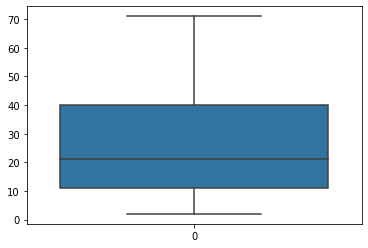

In [45]:
sns.boxplot(data=word_counts)

(-0.5, 799.5, 599.5, -0.5)

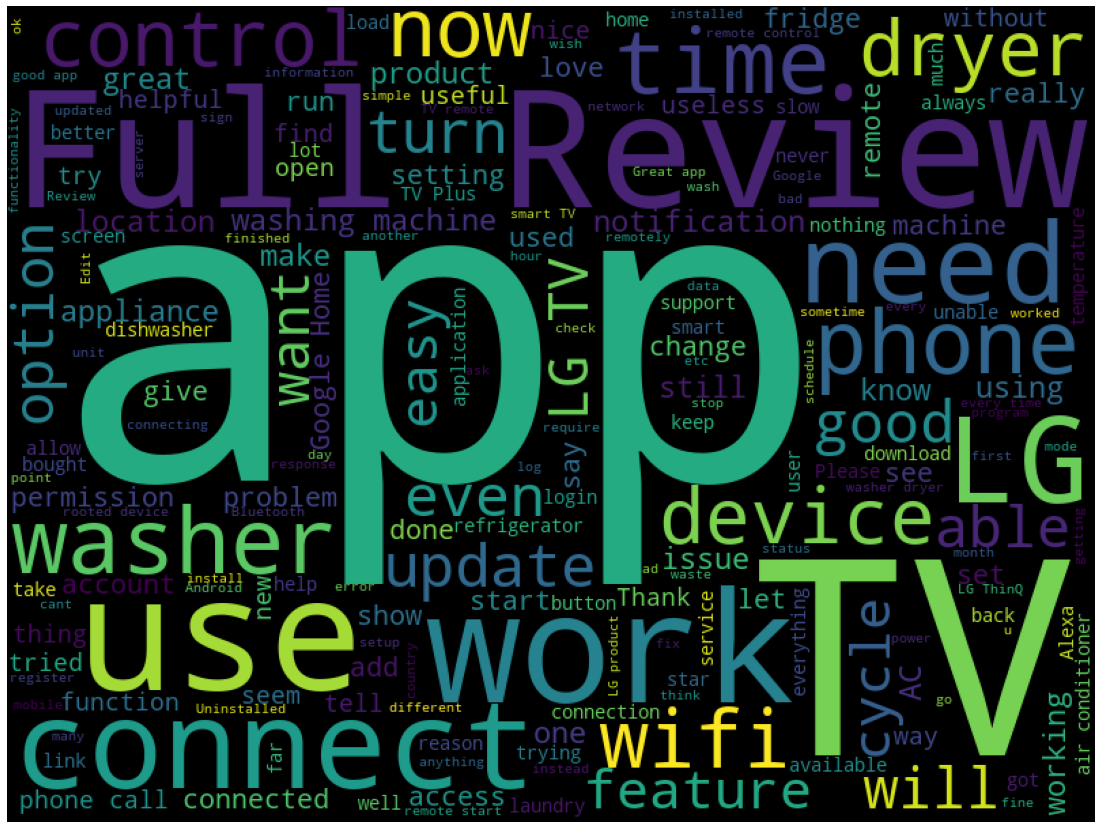

In [6]:
# 워드 클라우드 그리기
from wordcloud import WordCloud
cloud = WordCloud(width=800, height=600).generate(" ".join(review_df['comment']))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

1    5318
2    1164
3    1127
4    1112
5    2559
Name: star, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='star', ylabel='count'>

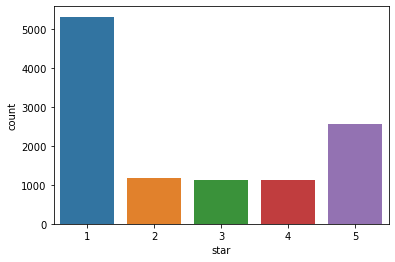

In [7]:
# 평점 분포
print(review_df['star'].value_counts().sort_index())
sns.countplot(review_df['star'],order=review_df['star'].value_counts().sort_index().index)